In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
def load_data():
    X = np.load("X.npy")
    y = np.load("y.npy")
    return X, y

In [3]:
X ,y = load_data()


In [4]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [5]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(400,)),
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(10, activation = 'linear')
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

In [6]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=75
)

Epoch 1/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - loss: 1.9113
Epoch 2/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.6747
Epoch 3/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.4247
Epoch 4/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.3389
Epoch 5/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.2942
Epoch 6/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.2643
Epoch 7/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.2416
Epoch 8/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.2239
Epoch 9/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.2087
Epoch 10/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.1961
Epoch 11/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.1844
Epoch 12/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1737
Epoch 13/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.1644
Epoch 14/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.1559
Epoch 15/75
157/157 ━━━━━━━━━━━

In [10]:
image_of_two = X[1015]

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
 predicting a Two: 
[[ -6.1932554   8.799      13.805824   -1.9514216 -15.721959  -13.765581
   -4.133926    5.4388313  -4.3868923 -12.634244 ]]
 Largest Prediction index: 2


In [12]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[2.04886175e-09 6.64609810e-03 9.93122995e-01 1.42468224e-07
  1.49021922e-13 1.05412901e-12 1.60645399e-08 2.30815072e-04
  1.24740245e-08 3.26759128e-12]]
Total of predictions: 1.000


In [19]:
m, n = X.shape
random_index = np.random.randint(m)
prediction = model.predict(X[random_index].reshape(1,400))
prediction_p = tf.nn.softmax(prediction)
yhat = np.argmax(prediction_p)
print(y[random_index],yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[2] 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


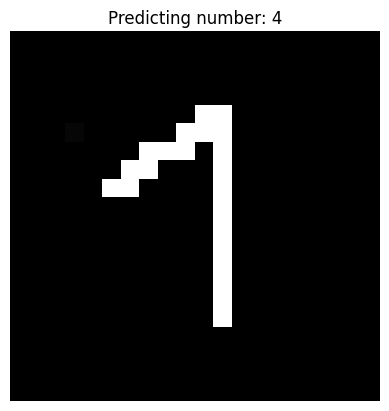

Predicting number: 4
tf.Tensor(
[[4.8500287e-11 9.0627316e-13 6.0181966e-15 1.1122346e-17 9.9999928e-01
  6.4499073e-07 4.1256520e-08 5.4152443e-11 2.9271685e-10 3.8489571e-08]], shape=(1, 10), dtype=float32)


In [26]:
import cv2
import matplotlib.pyplot as plt

# Tiền xử lí ảnh
image = cv2.imread("testcase1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = gray_image / 255.0
gray_image = gray_image.reshape(1, 400)

#Dự đoán giá trị
prediction = model.predict(gray_image)
prediction_p = tf.nn.softmax(prediction)
yhat = np.argmax(prediction_p)

#Chi tiết kết quả
plt.imshow(gray_image.reshape(20, 20), cmap='gray')
plt.title(f'Predicting number: {yhat}')
plt.axis('off')
plt.show()
print(f'Predicting number: {yhat}')
print(prediction_p)
